In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from zipfile import ZipFile


In [4]:
with ZipFile('drive/MyDrive/Classroom/Flowers-Dataset.zip','r') as zipObj:
  zipObj.extractall('drive/MyDrive/Flower1')

Data Augmentation

In [5]:
from glob import glob
from PIL import Image
from numpy import asarray
import numpy as np

In [6]:
frompath='/content/drive/Flower1/flowers/rose'
topath='/content/drive/Flower1'
folder='rose'
topath=topath+'/'+folder+'/'

In [7]:
images=glob(frompath+'/"')
c=0
for path in images:
  img=Image.open(path)
  img=img.resize((224,224))
  img.save(topath+str(c)+'.jpg')
  c+=1
  miring=img.transpose(Image.FLIP_LEFT_RIGHT)
  miring.save(topath+str(c)+'.jpg')
  c+=1
  rotating=img.rotate(90,Image.NEAREST,expand = 1)
  rotating.save(topath+str(c)+'.jpg')
  c+=1
  mirroting=rotating.transpose(Image.FLIP_LEFT_RIGHT)
  mirroting.save(topath+str(c)+'.jpg')
  c+=1

Image Augmentation

In [8]:
import cv2

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
%matplotlib inline

In [11]:
image = cv2.imread('/content/drive/MyDrive/Flower1/flowers/rose/3667366832_7a8017c528_n.jpg')
height,width = image.shape[:2]
resized_image=cv2.resize(image, (3*width,3*height),interpolation=cv2.INTER_CUBIC)

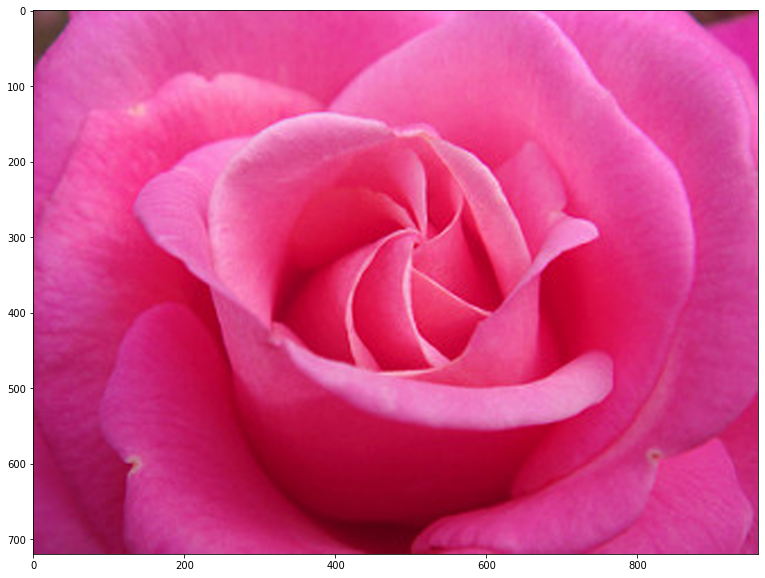

In [12]:
fig= plt.gcf()

fig.set_size_inches(18,10)
#fig.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
#pip install Augmentor

In [14]:
pip install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
pip install ipyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.0 MB/s 


In [16]:
import imageio
import ipyplot
import imgaug as ia
import imgaug.augmenters as iaa


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `force_b64` param to `True`.
        


In [17]:
input_img = imageio.imread('/content/drive/MyDrive/Flower1/flowers/rose/10090824183_d02c613f10_m.jpg')

In [18]:
hflip= iaa.Fliplr(p=1.0)
input_hf= hflip.augment_image(input_img)


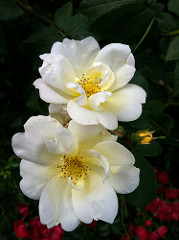
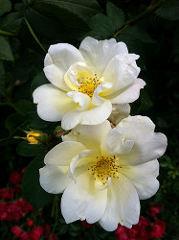
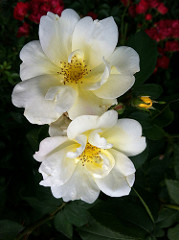


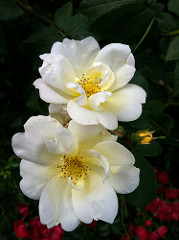
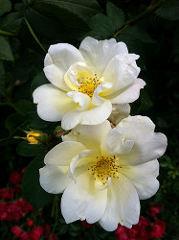
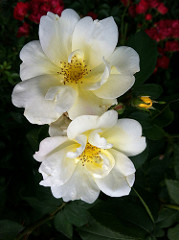

In [19]:
vflip= iaa.Flipud(p=1.0) 
input_vf= vflip.augment_image(input_img)
images_list=[input_img, input_hf, input_vf]
labels = ['Original', 'Horizontally flipped', 'Vertically flipped']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


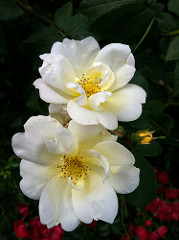
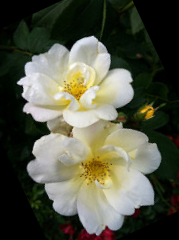


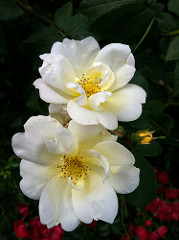
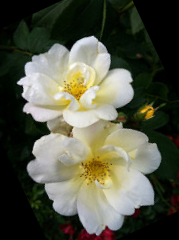

In [20]:
rot1 = iaa.Affine(rotate=(-30,30))
input_rot1 = rot1.augment_image(input_img)
images_list=[input_img, input_rot1]
labels = ['Original', 'Rotated Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


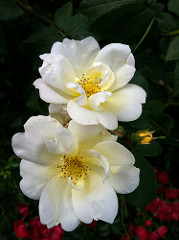
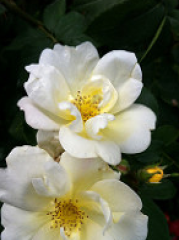


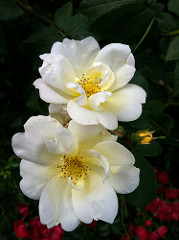
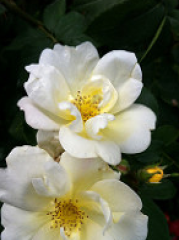

In [21]:
crop1 = iaa.Crop(percent=(0, 0.3)) 
input_crop1 = crop1.augment_image(input_img)
images_list=[input_img, input_crop1]
labels = ['Original', 'Cropped Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


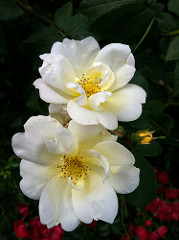
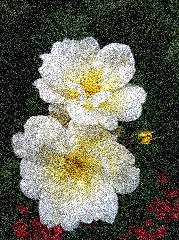


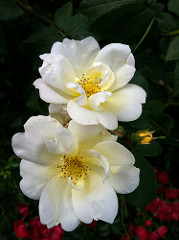
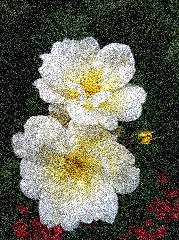

In [22]:
noise=iaa.AdditiveGaussianNoise(10,40)
input_noise=noise.augment_image(input_img)
images_list=[input_img, input_noise]
labels = ['Original', 'Gaussian Noise Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


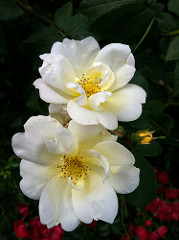
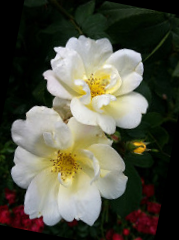


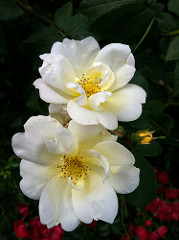
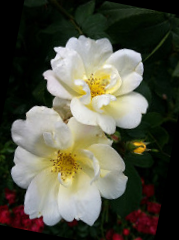

In [23]:
shear = iaa.Affine(shear=(-40,40))
input_shear=shear.augment_image(input_img)
images_list=[input_img, input_shear]
labels = ['Original', 'Image Shearing']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


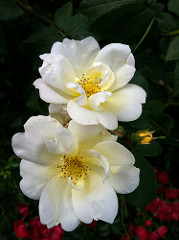
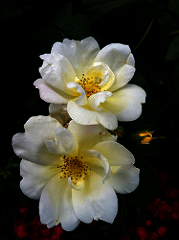
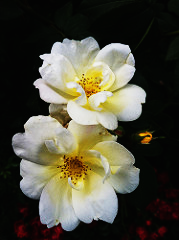
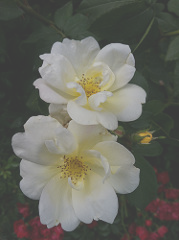


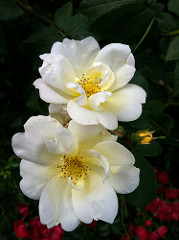
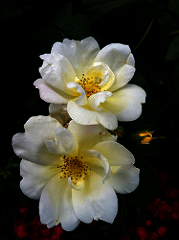
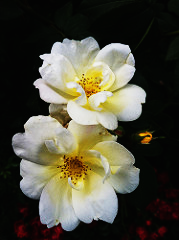
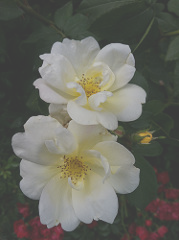

In [24]:
contrast=iaa.GammaContrast((0.5, 2.0))
contrast_sig = iaa.SigmoidContrast(gain=(5, 10), cutoff=(0.4, 0.6))
contrast_lin = iaa.LinearContrast((0.6, 0.4))
input_contrast = contrast.augment_image(input_img)
sigmoid_contrast = contrast_sig.augment_image(input_img)
linear_contrast = contrast_lin.augment_image(input_img)
images_list=[input_img, input_contrast,sigmoid_contrast,linear_contrast]
labels = ['Original', 'Gamma Contrast','SigmoidContrast','LinearContrast']
ipyplot.plot_images(images_list,labels=labels,img_width=180)

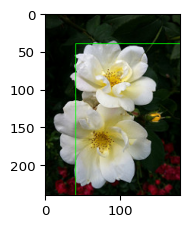

In [25]:
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
bbs = BoundingBoxesOnImage([
 BoundingBox(x1=40, x2=550, y1=40, y2=780)
], shape=input_img.shape)
ia.imshow(bbs.draw_on_image(input_img))

In [26]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [27]:
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [28]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [29]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [30]:
X_train=X_train/255
X_test=X_test/255

In [31]:
model=Sequential()

In [32]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

In [33]:
model.add(MaxPool2D(2,2))

In [34]:
model.add(Flatten())
model.add(Dense(100,activation='relu'))

In [35]:
model.add(Dense(10,activation='softmax'))

In [36]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1626 - accuracy: 0.9508
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0568 - accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0354 - accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0240 - accuracy: 0.9921
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0178 - accuracy: 0.9943
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0127 - accuracy: 0.9958
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0089 - accuracy: 0.9969
Epoch 8/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0084 - accuracy: 0.9973
Epoch 9/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0062 - accuracy: 0.9977
Epoch 10/10
1875/1875 [==============================] - 41s 22m

In [38]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0548 - accuracy: 0.9864


[0.05483489856123924, 0.9864000082015991]